In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge
import scipy.stats as stats

In [140]:
batters_df = pd.read_csv('../DEA Notebooks/cleaned_batting_years_1985_to_2017.csv')

In [141]:
del batters_df['Unnamed: 0']

In [142]:
batters_df.columns

Index(['ID', 'NAME', 'HEIGHT', 'WEIGHT', 'YEAR', 'AGE', 'TM', 'LG', 'G', 'PA',
       'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA',
       'OBP', 'SLG', 'OPS', 'OPS+', 'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB',
       'AWARDS', 'SALARY', 'BATS_Left', 'BATS_Right', 'LG_SALARY_YEAR',
       'LG_SALARY_MEAN', 'POS_1', 'POS_2', 'POS_3', 'POS_4', 'POS_5', 'POS_6',
       'POS_7', 'POS_8', 'POS_9', 'POS_D', 'LG_MEAN_HR'],
      dtype='object')

In [143]:


f1 = ['AGE', 'PA',
       'R', 'H', '2B', 'HR', 'RBI', 'BB', 'SO', 'BA',
       'OBP', 'SLG', 'OPS', 
       'LG_SALARY_YEAR']
f2 = ['AGE', 'LG_SALARY_MEAN', 'BB', 'H', 'R', '2B', 'HR', 'RBI', 'PA', 'TB']
f3 = ['AGE', 'OBP', 'SLG', 'HR', 'LG_SALARY_MEAN', 'RBI']
position_columns = ['POS_2', 'POS_3', 'POS_4', 'POS_5', 'POS_6',
       'POS_7', 'POS_8', 'POS_9', 'POS_D']

hr_f1 = ['WEIGHT', 'BB', 'H', 'R', '2B', '3B', 'RBI', 'BA', 'SO', 'SB']
hr_f2 = ['AGE', 'WEIGHT', 'OPS', 'R', 'OBP', 'SO']

hr_f3_no_hr_hints = ['BB', 'SO', 'SB', 'WEIGHT', '2B', '3B']

In [144]:
subset_to_test_with = batters_df[(batters_df.PA >= 400) & (batters_df.YEAR != 1994)]

y_value_to_test = subset_to_test_with['HR']
#y_value_to_test = np.log(subset_to_test_with['SALARY'])

subset_to_test_with.shape

(1801, 49)

In [145]:


y = np.asarray(y_value_to_test)
features_to_test = hr_f3_no_hr_hints + position_columns
X = np.asarray(subset_to_test_with[features_to_test])

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=11)


In [146]:
kf = KFold(n_splits=5, shuffle=True, random_state = 0)
lr = Lasso(alpha=0.02)#LinearRegression()

train_scores = []
train_errors = []
coefs = []
for train_ind, val_ind in kf.split(X,y):
        X_train, y_train = X[train_ind], y[train_ind]
        X_val, y_val = X[val_ind], y[val_ind] 
        
        #print(np.argwhere(np.isnan(X_train)))
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)
        lr.fit(X_train_scaled, y_train)
        
        valid_set_pred = lr.predict(X_val_scaled)
        train_scores.append(lr.score(X_val_scaled, y_val))
        train_errors.append(np.sqrt(np.mean((valid_set_pred - y_val)**2)))
        coefs.append(list(zip(features_to_test, lr.coef_)))
        

In [147]:
np.mean(train_scores)

0.5423479137964311

In [148]:
coefs

[[('BB', 1.7777667815008935),
  ('SO', 4.0449441779756201),
  ('SB', -0.93463578189507834),
  ('WEIGHT', 1.2727856425274597),
  ('2B', 1.8446049928459638),
  ('3B', -0.82558437856413636),
  ('POS_2', -0.0),
  ('POS_3', 0.92381863196764835),
  ('POS_4', -0.96363450104722659),
  ('POS_5', -0.0),
  ('POS_6', -0.86857853992491352),
  ('POS_7', 0.73106532256911472),
  ('POS_8', -0.28127955359450901),
  ('POS_9', 0.84548453091564224),
  ('POS_D', 0.39175180068826027)],
 [('BB', 1.7808867795063226),
  ('SO', 3.7720430869017316),
  ('SB', -1.3163770210797163),
  ('WEIGHT', 1.5715277603778592),
  ('2B', 1.7614556059330093),
  ('3B', -0.81138026505371685),
  ('POS_2', 0.0),
  ('POS_3', 0.65654007351197363),
  ('POS_4', -0.96454139746153766),
  ('POS_5', -0.34045255134888436),
  ('POS_6', -1.0538005938286064),
  ('POS_7', 0.56034646779300135),
  ('POS_8', -0.3238220310758379),
  ('POS_9', 0.66833293348997547),
  ('POS_D', 0.11294172185806296)],
 [('BB', 1.733859850424089),
  ('SO', 3.924883884115

In [149]:
lr = LinearRegression()
train_scores = []
train_errors = []
coefs = []
for train_ind, val_ind in kf.split(X,y):
        X_train, y_train = X[train_ind], y[train_ind]
        X_val, y_val = X[val_ind], y[val_ind] 
        
        poly = PolynomialFeatures(degree=2) 

        X_train_poly = poly.fit_transform(X_train)
        X_val_poly = poly.transform(X_val)
        
        lr.fit(X_train_poly, y_train)
        
        valid_set_pred = lr.predict(X_val_poly)
        train_scores.append(lr.score(X_val_poly, y_val))
        train_errors.append(np.sqrt(np.mean((valid_set_pred - y_val)**2)))
        coefs.append(list(zip(features_to_test, lr.coef_)))
        
        

In [150]:
np.mean(train_scores)

0.53571306191736956

In [151]:
coefs

[[('BB', -2.4480857500697413e-11),
  ('SO', -0.10732980819280181),
  ('SB', 0.18887960748649521),
  ('WEIGHT', -0.21900333359478111),
  ('2B', -0.027074614387200231),
  ('3B', 0.3045415854140528),
  ('POS_2', -1.4833437199027411),
  ('POS_3', 2.0985020450300942),
  ('POS_4', 1.2815171335383224),
  ('POS_5', 5.5816225346585329),
  ('POS_6', 4.0016307638273938),
  ('POS_7', -13.396501281340338),
  ('POS_8', -1.071440024271417),
  ('POS_9', -4.0676674016640364),
  ('POS_D', -1.771872057158588)],
 [('BB', -1.9257633153863815e-13),
  ('SO', -0.017670368376142685),
  ('SB', 0.14966665179902827),
  ('WEIGHT', -0.18545944843181195),
  ('2B', -0.019017924070329342),
  ('3B', 0.33490812139039189),
  ('POS_2', -1.0700486351803749),
  ('POS_3', 2.8889832258691053),
  ('POS_4', 0.79528632240413233),
  ('POS_5', 5.2295412492528444),
  ('POS_6', 0.02515222837075809),
  ('POS_7', -13.977346262920907),
  ('POS_8', 2.5998932470618663),
  ('POS_9', -2.0716074702520526),
  ('POS_D', -1.5620514339068789)],

In [152]:
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    s = len(y)
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x)
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")
    

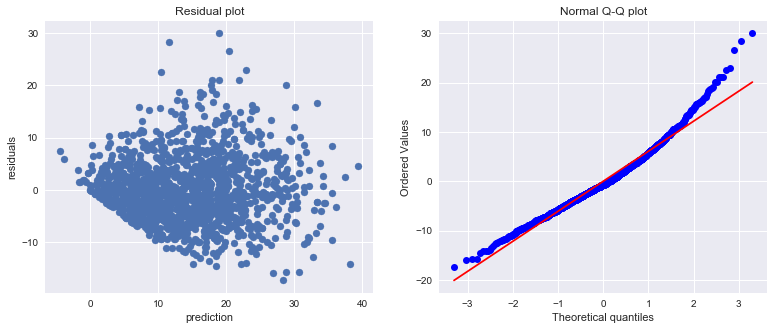

In [153]:
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X)
#lr = LinearRegression()
#lr.fit(X_train_poly, y)
#y_pres = lr.predict()
diagnostic_plot(X_train_poly, y)

In [154]:
model = sm.OLS(y,sm.add_constant(X))
model.data.xnames = features_to_test
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     127.4
Date:                Fri, 02 Feb 2018   Prob (F-statistic):          3.56e-239
Time:                        05:16:04   Log-Likelihood:                -4736.4
No. Observations:                1440   AIC:                             9503.
Df Residuals:                    1425   BIC:                             9582.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BB           -16.7635      2.110     -7.946      0.000     -20.902     -12.625
SO             0.0784      0.009      9.119      0.000       0.062       0.095
SB             0.1342      0.007     20.133      0.000       0.121       0.147
WEIGHT        -0.0860      0.015     -5.592      0.000      -0.116      -0.056
2B             0.0796      0.013      6.243      0.000       0.055       0.105
3B             0.2467      0.023     10.508      0.000       0.201       0.293
POS_2         -0.3100      0.074     -4.187      0.000      -0.455      -0.165
POS_3         -2.1094      0.667     -3.164      0.002      -3.417      -0.802
POS_4          0.3337      0.586      0.569      0.569      -0.816       1.484
POS_5         -4.8468      0.487     -9.943      0.000      -5.803      -3.891
POS_6         -2.5460      0.539     -4.727      0.000      -3.603      -1.489
POS_7         -4.9205      0.497     -9.892      0.000      -5.896      -3.945
POS_8          0.3160      0.556      0.569      0.570      -0.774       1.406
POS_9         -2.6701      0.549     -4.867      0.000      -3.746      -1.594
POS_D          0.2865      0.560      0.511      0.609      -0.812       1.385
==============================================================================
Omnibus:                      147.437   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.784
Skew:                           0.748   Prob(JB):                     4.20e-49
Kurtosis:                       4.216   Cond. No.                     2.65e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.02e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [155]:
def find_alpha():
    #X2, X2_test, y2, y2_test = train_test_split(X, y, test_size=.2, random_state=10)
    params = {
        "alpha": np.logspace(-4, -.1, 20)
    }

    grid_est = GridSearchCV(Lasso(), param_grid=params, cv=5)
    grid_est.fit(X, y)
    df = pd.DataFrame(grid_est.grid_scores_)
    df["alpha"] = df.parameters.apply(lambda val: val["alpha"])
    plt.plot(np.log(df.alpha), df.mean_validation_score);
    return grid_est.grid_scores_

/Users/Munoz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Munoz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Munoz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Munoz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[mean: 0.53614, std: 0.04070, params: {'alpha': 0.0001},
 mean: 0.53614, std: 0.04070, params: {'alpha': 0.00016042171611153241},
 mean: 0.53615, std: 0.04070, params: {'alpha': 0.00025735127000169099},
 mean: 0.53615, std: 0.04070, params: {'alpha': 0.00041284732377153599},
 mean: 0.53615, std: 0.04070, params: {'alpha': 0.00066229676171483253},
 mean: 0.53616, std: 0.04069, params: {'alpha': 0.001062467830894041},
 mean: 0.53616, std: 0.04069, params: {'alpha': 0.0017044291274531946},
 mean: 0.53618, std: 0.04069, params: {'alpha': 0.0027342744561652328},
 mean: 0.53619, std: 0.04068, params: {'alpha': 0.0043863700057795363},
 mean: 0.53619, std: 0.04067, params: {'alpha': 0.0070366900382730557},
 mean: 0.53615, std: 0.04067, params: {'alpha': 0.011288378916846895},
 mean: 0.53602, std: 0.04068, params: {'alpha': 0.018109011179578204},
 mean: 0.53560, std: 0.04076, params: {'alpha': 0.029050786505108613},
 mean: 0.53471, std: 0.04095, params: {'alpha': 0.04660377025539271},
 mean: 0.

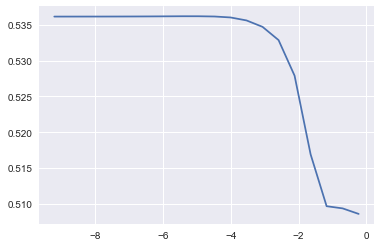

In [156]:
find_alpha()

In [157]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=1800, max_features=3)
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.94030233982912881

In [158]:
lr = Lasso(alpha=.0001)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

lr.fit(X_scaled, y)

test_pred_y = lr.predict(X_test_scaled)

lr.score(X_test_scaled, y_test)

/Users/Munoz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.47399884833369915

In [159]:
the_list = list(zip(features_to_test, lr.coef_))
for item in the_list:
    print ('{}: {:.3f}'.format(item[0], item[1]))

BB: 1.720
SO: 3.946
SB: -1.220
WEIGHT: 1.392
2B: 1.925
3B: -0.857
POS_2: -0.121
POS_3: 0.672
POS_4: -1.041
POS_5: -0.290
POS_6: -1.030
POS_7: 0.638
POS_8: -0.344
POS_9: 0.657
POS_D: 0.231
